# MMLS Review Assignment - Visentin Luca

### On the 8th of February, 2023

## Assignment
Consider an autocatalytic reaction, with behavioural reactions:
$$
A \rightarrow_1 A + X\\
2X + Y \rightarrow_1 3X\\
B + X \rightarrow_1 B + Y\\
X \rightarrow_1 0
$$

This system is called *deterministic Brusselator*.

With boundary conditions:
$$
X(0) = Y(0) = 1\\
A = 1\\
B = 2.5
$$

The resulting differential equations that satisfy these reactions are:
$$
\frac{dX(t)}{dt} = A + X(t)^2 \cdot Y(t) - BX(t) - X(t)\\
\frac{dY(t)}{dt} = BX(t) - X(t)^2 \cdot Y(t)
$$

Please:
1. Calculate the result of the system in the space `[0, 20]` through the `odeint` function.
2. Calculate and plot $\frac{dX(t)}{dt}$ and $\frac{dY(t)}{dt}$;
3. Calculate the integrals $\int_0^{20} X(t)dt$ and $\int_0^{20} Y(t)dt$
4. Optionally, calculate the result of the system in the same space above without the `odeint` function, and compare it with the result from point 1.

### Execution
Point 1 and 4 hinge on the last lesson, where we talked about the `odeint` function.

As the differential equations are already set, then we can just move onto using `odeint`:

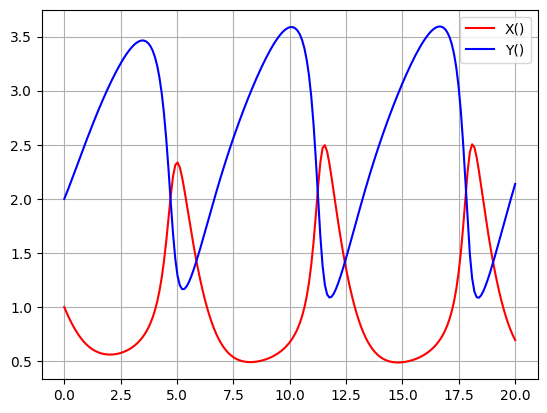

In [1]:
import matplotlib.pylab as pl
from scipy.integrate import odeint

def dX(xt, yt, a = 1, b = 2.5):
    return a + (xt ** 2) * yt - b * xt - xt

def dY(xt, yt, b = 2.5):
    return b * xt - (xt ** 2) * yt

def deterministic_brusselator(state, t, a, b):
    # Unpack for simplicity
    xt, yt = state
    
    # Equation 1, generating the next xt
    dx = dX(xt, yt, a, b)
    # Equation 2, generating the next yt
    dy = dY(xt, yt, b)
    
    # Return the new state
    return dx, dy

dt_space = pl.linspace(0, 20, 200)

dt_result = odeint(
    deterministic_brusselator, # Our system
    [1, 2], # The initial state, where X(0) and Y(0) are 1
    dt_space, # The space of interest
    args = (1, 2.5) # The A and B parameters, that will remain constant
)

# Plot the results
pl.plot(dt_space, dt_result[:,0], "r", label = "X()")
pl.plot(dt_space, dt_result[:,1], "b", label = "Y()")
pl.legend()
pl.grid()

We now have a representation for $X(t)$ and $Y(t)$, derived from our system

We can, numerically, calculate the derivatives of these function quite easily with the definition of derivative.

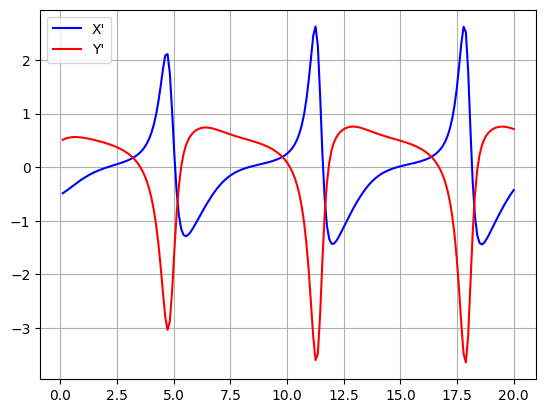

In [2]:
# In my first attempt I recalculated X and Y with `odeint`
# for every input space, but the errors made by the function fluctuated so much
# the the resulting derivatives and integrals are not good at all.

# I'll just do it simply like this:
delta = dt_space[1] - dt_space[0]
der_x = pl.diff(dt_result[:,0]) / delta # 0 is X
der_y = pl.diff(dt_result[:,1]) / delta # 1 is Y

pl.plot(dt_space[1:], der_x, "b", label = "X'")
pl.plot(dt_space[1:], der_y, "r", label = "Y'")
pl.legend()
pl.grid()

Finally, we can calculate the integrals, again with the same delta

In [4]:
# I am going to use the "right" method from our lesson in integrals.
# The center method is better, in my opinion, but we already have the
# result from the previous steps ready to do either right- or left-rectangles

# The space is already from 0 to 20, so there is no need to change it
# The delta also does not change from the derivative exercise
print(f"The integral of X(t) in [0, 20] is {sum(dt_result[:,0][1:] * delta)}")
print(f"The integral of Y(t) in [0, 20] is {sum(dt_result[:,1][1:] * delta)}")

The integral of X(t) in [0, 20] is 20.152512789554432
The integral of Y(t) in [0, 20] is 50.619589242123425


In [ ]:
# I didn't have time to run Euler's formula for approximating the differential system. :(